In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.models import Sequential, load_model
import time
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
seed = 1
np.random.seed(seed)

In [3]:
dataset = pd.read_csv(r'C:\Users\Acer\Downloads\Ann_model_sample.csv', header =0)
dataset.head()


,Divisoinal Secretary Area,lat,lon,year,DOY,Rainfalls,Humidity,Temparature,Harvest
0,01. Ampara,7.29191,81.67841,2019,91,0.39,69.43,29.18,10770.38
1,NaN,7.29191,81.67841,2019,92,0.23,71.53,28.71,10770.38
2,NaN,7.29191,81.67841,2019,93,0.08,68.92,28.48,10770.38
3,NaN,7.29191,81.67841,2019,94,0.01,61.05,28.57,10770.38
4,NaN,7.29191,81.67841,2019,95,0.05,59.81,28.71,10770.38


In [5]:
dataset.head()

,Divisoinal Secretary Area,lat,lon,year,DOY,Rainfalls,Humidity,Temparature,Harvest
0,01. Ampara,7.29191,81.67841,2019,91,0.39,69.43,29.18,10770.38
1,NaN,7.29191,81.67841,2019,92,0.23,71.53,28.71,10770.38
2,NaN,7.29191,81.67841,2019,93,0.08,68.92,28.48,10770.38
3,NaN,7.29191,81.67841,2019,94,0.01,61.05,28.57,10770.38
4,NaN,7.29191,81.67841,2019,95,0.05,59.81,28.71,10770.38


In [8]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X)
print(y)


[[7.29191]
 [7.29191]
 [7.29191]
 ...
 [7.28361]
 [7.28361]
 [7.28361]]
[81.67841 81.67841 81.67841 ... 81.81121 81.81121 81.81121]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
X_train.shape

(2846, 1)

In [11]:
y_train.shape

(2846,)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:
classifier = Sequential()
classifier.add(Dense(output_dim = 9, init = 'uniform',  input_dim = 1))
classifier.add(Dense(output_dim = 9, init = 'uniform'))
classifier.add(Dense(1))
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','mse'])
history=classifier.fit(X_train, y_train,validation_data =[X_test,y_test], batch_size = 10, nb_epoch = 100)
classifier.save('stock_prediction6.h5')

C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=9, kernel_initializer="uniform")`
  
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=9, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2846 samples, validate on 1220 samples
Epoch 1/100
2846/2846 [==============================] - 1s 265us/step - loss: 76.2959 - mean_absolute_error: 76.2959 - mse: 5849.6040 - val_loss: 62.4515 - val_mean_absolute_error: 62.4514 - val_mse: 3900.2869
Epoch 2/100
2846/2846 [==============================] - 1s 200us/step - loss: 24.6517 - mean_absolute_error: 24.6517 - mse: 1108.9402 - val_loss: 0.2605 - val_mean_absolute_error: 0.2605 - val_mse: 0.1208
Epoch 3/100
2846/2846 [==============================] - 1s 199us/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mse: 0.0948 - val_loss: 0.2257 - val_mean_absolute_error: 0.2257 - val_mse: 0.0977
Epoch 4/100
2846/2846 [==============================] - 1s 201us/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mse: 0.1098 - val_loss: 0.2241 - val_mean_absolute_error: 0.2241 - val_mse: 0.1063
Epoch 5/100
2846/2846 [==============================] - 1s 215us/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mse: 0.1087 - v

Epoch 82/100
2846/2846 [==============================] - 1s 196us/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mse: 0.1055 - val_loss: 0.2322 - val_mean_absolute_error: 0.2322 - val_mse: 0.1002
Epoch 83/100
2846/2846 [==============================] - 1s 194us/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mse: 0.1045 - val_loss: 0.2219 - val_mean_absolute_error: 0.2219 - val_mse: 0.0827
Epoch 84/100
2846/2846 [==============================] - 1s 197us/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mse: 0.0956 - val_loss: 0.2892 - val_mean_absolute_error: 0.2892 - val_mse: 0.1600
Epoch 85/100
2846/2846 [==============================] - 1s 197us/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mse: 0.0948 - val_loss: 0.2216 - val_mean_absolute_error: 0.2216 - val_mse: 0.0831
Epoch 86/100
2846/2846 [==============================] - 1s 194us/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mse: 0.1034 - val_loss: 0.2592 - val_mean_absolute_error: 0.2592 - val_ms

In [16]:
classifier = load_model('stock_prediction6.h5')

In [17]:
MAE,mse,loss = classifier.evaluate(X_test,y_test)
MAE

1220/1220 [==============================] - 0s 47us/step


0.24457823331238793

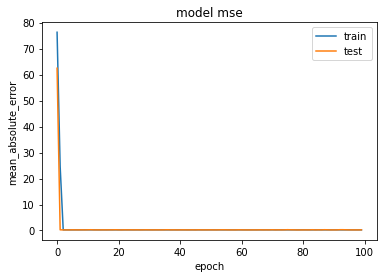

In [18]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mse')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [19]:
classifier = Sequential()
classifier.add(Dense(output_dim = 9, init = 'uniform',  input_dim = 1))
classifier.add(Dense(output_dim = 9, init = 'uniform'))
classifier.add(Dense(1))
classifier.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
history=classifier.fit(X_train, y_train,validation_data =[X_test,y_test], batch_size = 10, nb_epoch = 100)
classifier.save('stock_prediction4.h5')

C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=9, kernel_initializer="uniform")`
  
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=9, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2846 samples, validate on 1220 samples
Epoch 1/100
2846/2846 [==============================] - 1s 283us/step - loss: 5805.2636 - mse: 5805.2666 - val_loss: 3875.8472 - val_mse: 3875.8467
Epoch 2/100
2846/2846 [==============================] - 1s 213us/step - loss: 1391.8317 - mse: 1391.8315 - val_loss: 52.7629 - val_mse: 52.7629
Epoch 3/100
2846/2846 [==============================] - 1s 205us/step - loss: 6.2232 - mse: 6.2232 - val_loss: 0.0792 - val_mse: 0.0792
Epoch 4/100
2846/2846 [==============================] - 1s 196us/step - loss: 0.0739 - mse: 0.0739 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 5/100
2846/2846 [==============================] - 1s 196us/step - loss: 0.0739 - mse: 0.0739 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 6/100
2846/2846 [==============================] - 1s 196us/step - loss: 0.0739 - mse: 0.0739 - val_loss: 0.0799 - val_mse: 0.0799
Epoch 7/100
2846/2846 [==============================] - 1s 196us/step - loss: 0.0739 - mse: 0.0739 - val_loss

Epoch 60/100
2846/2846 [==============================] - 1s 198us/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.1238 - val_mse: 0.1238
Epoch 61/100
2846/2846 [==============================] - 1s 193us/step - loss: 0.0909 - mse: 0.0909 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 62/100
2846/2846 [==============================] - 1s 194us/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 63/100
2846/2846 [==============================] - 1s 202us/step - loss: 0.0886 - mse: 0.0886 - val_loss: 0.1140 - val_mse: 0.1140
Epoch 64/100
2846/2846 [==============================] - 1s 197us/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 65/100
2846/2846 [==============================] - 1s 214us/step - loss: 0.0938 - mse: 0.0938 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 66/100
2846/2846 [==============================] - 1s 197us/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0791 - val_mse: 0.0791
Epoch 67/100
2846/2846 [==========

In [20]:
MAE,mse = classifier.evaluate(X_test,y_test)
mse

1220/1220 [==============================] - 0s 25us/step


0.10588877648115158

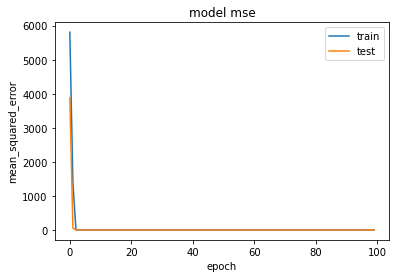

In [21]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [107]:
kf = KFold(n_splits=7)

def get_score(model, X_train, X_test, y_train, y_test):
        model.fit(X_train, y_train)
        return model.evaluate(X_test, y_test)

scores_SVM=[]

for train_index,test_index in kf.split(X,y):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scores_SVM.append(get_score(classifier, X_train, X_test, y_train, y_test))
    print(scores_SVM)


Train Index:  [1102 1103 1104 ... 7710 7711 7712] 

Test Index:  [   0    1    2 ... 1099 1100 1101]
Epoch 1/1
1102/1102 [==============================] - 0s 26us/step
[[223.2855461106759, 223.2855682373047, 50045.81640625]]
Train Index:  [   0    1    2 ... 7710 7711 7712] 

Test Index:  [1102 1103 1104 ... 2201 2202 2203]
Epoch 1/1
1102/1102 [==============================] - 0s 29us/step
[[223.2855461106759, 223.2855682373047, 50045.81640625], [352.232067405853, 352.23211669921875, 153248.96875]]
Train Index:  [   0    1    2 ... 7710 7711 7712] 

Test Index:  [2204 2205 2206 ... 3303 3304 3305]
Epoch 1/1
1102/1102 [==============================] - 0s 27us/step
[[223.2855461106759, 223.2855682373047, 50045.81640625], [352.232067405853, 352.23211669921875, 153248.96875], [303.8979954935894, 303.8980407714844, 102263.3515625]]
Train Index:  [   0    1    2 ... 7710 7711 7712] 

Test Index:  [3306 3307 3308 ... 4405 4406 4407]
Epoch 1/1
1102/1102 [==============================] - 0s